## ML Project - Image Classification using SVM algorithm

### Dataset Preparation

In [ ]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/animal_images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/animal_images'
os.listdir(folder_path)

['dogs', 'cats', 'pandas', '.ipynb_checkpoints']

In [ ]:
p = Path(folder_path)

labels_dict = {'cat': 0, 'dog': 1, 'panda': 2}

labels = []
image_data = []

dirs = p.glob("*")
for folder in dirs:
  # print(folder)
  label = str(folder).split("/")[-1][:-1]

  if (label != '.ipynb_checkpoints'):
    for img_path in folder.glob("*.jpg"):
      img = image.load_img(img_path, target_size=(32, 32))
      img_array = image.img_to_array(img)
      image_data.append(img_array)
      labels.append(labels_dict[label])

In [ ]:
print(len(image_data))
print(len(labels))

600
600


In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(600, 32, 32, 3) (600,)


### Randomly shuffling the data

In [ ]:
import random

combined = list(zip(image_data, labels))
random.shuffle(combined)

#Unzip
image_data[:], labels[:] = zip(*combined)

### Visualizing the data

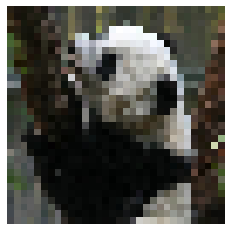

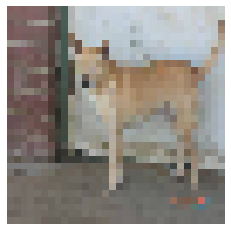

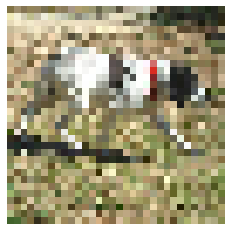

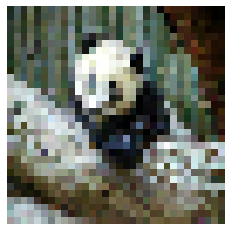

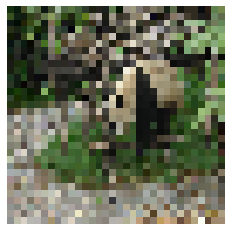

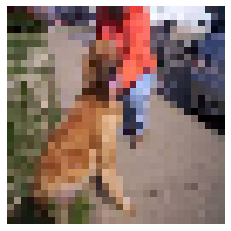

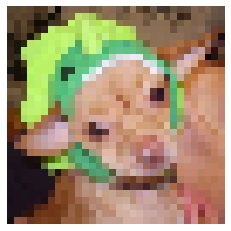

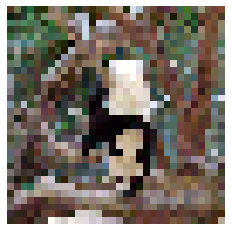

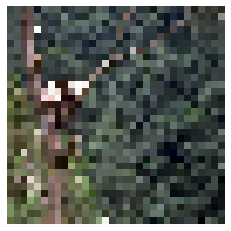

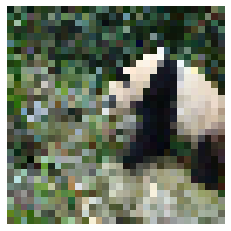

In [ ]:
def drawImg(img):
  from matplotlib import pyplot as plt
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  return

for i in range(10):
  drawImg(image_data[i])

### SVM Classifier

In [ ]:
class SVM:
  def __init__(self, C = 1.0):
    self.C = C
    self.W = 0
    self.b = 0
  
  def hingeLoss(self, W, b, X, Y):
    loss = 0.0
    loss += .5 * np.dot(W, W.T)

    m = X.shape[0]    #no. of data points

    for i in range(m):
      ti = Y[i] * (np.dot(W, X[i].T) + b)
      loss += self.C * max(0, (1 - ti))
    
    return loss[0][0]   #because loss is returned as matrix
  
  def fit (self, X, Y, batch_size=100, learning_rate=0.001, maxItr=300):
    n_features = X.shape[1]
    n_samples = X.shape[0]

    n = learning_rate
    c = self.C

    #Initialize the model parameters
    W = np.zeros((1, n_features))
    bias = 0

    #Training from here..
    losses = []   #so that all losses can be plotted later for analysis

    for i in range(maxItr):
      #Training loop

      l = self.hingeLoss(W, bias, X, Y)   #loss at start of training
      losses.append(l)
      
      #Generating random sequence of numbers from [0, n_samples]
      ids = np.arange(n_samples)
      np.random.shuffle(ids)

      #Batch Gradient Descent with random shuffling
      for batch_start in range(0, n_samples, batch_size):
        #Assuming 0 gradient for the batch initially
        gradW = 0
        gradB = 0

        #Iterating over all examples in the mini batch
        for j in range(batch_start, batch_start + batch_size):
          if j < n_samples:     #to avoid going out of range (batch)
            i = ids[j]
            ti = Y[i] * (np.dot(W, X[i].T) + bias)

            if ti > 1:      # no error
              gradW += 0
              gradB += 0
            else:
              # Derived using differential calculus
              gradW += c * Y[i] * X[i]
              gradB += c * Y[i]

        #Gradient for the batch is ready! Update W,B using Gradient Descent rule
        W = W - n * W + n * gradW
        bias = bias + n * gradB

    self.W = W
    self.b = bias
    return W, bias, losses

### Converting data for One vs One classification

In [ ]:
M = image_data.shape[0]
image_data = image_data.reshape(M, -1)    #to flatten every img into a single row
print(image_data.shape)
print(labels.shape)

(600, 3072)
(600,)


In [ ]:
classes = len(np.unique(labels))
print(classes)

3


In [ ]:
def classWiseData(x, y):
  data = {}
  
  for i in range(classes):
    data[i] = []

  for i in range(x.shape[0]):
    data[y[i]].append(x[i])
  
  for k in data.keys():
    data[k] = np.array(data[k])

  return data

In [ ]:
data = classWiseData(image_data, labels)

In [ ]:
print(data[0].shape)    # (no. of images, no. of features)
print(data[0].shape[0])  #cats
print(data[1].shape[0])  #dogs
print(data[2].shape[0])  #pandas

(200, 3072)
200
200
200


In [ ]:
def getDataPairForSVM(d1, d2):
  #Function to combine data of 2 classes d1 and d2 into a single matrix
   
  l1, l2 = d1.shape[0], d2.shape[0]

  samples = l1 + l2
  features = d1.shape[1]    #3072

  data_pair = np.zeros((samples, features))
  data_labels = np.zeros((samples,))

  data_pair[:l1, :] = d1
  data_pair[l1:, :] = d2

  data_labels[:l1] = -1
  data_labels[l1:] = +1

  return data_pair, data_labels

### Training Nc2 SVM classifiers

[400.0, 398.9199795921216, 397.8400222900058, 396.76011701149304, 395.6802608669167, 394.6004648182398, 393.5207198494971, 392.44102583893067, 391.3613882685556, 390.28180124635185, 389.202267707615, 388.12279304603436, 387.0433722084117, 385.9640088545805, 384.8847009510595, 383.80544023848535, 382.7262350443032, 381.64708459536274, 380.5679814010948, 379.48893718625527, 378.45882593259745, 377.43667298117356, 376.48211017746456, 375.5542268766707, 374.6263874392148, 373.6986011062264, 372.770859873164, 371.8431662680929, 370.9155182429464, 369.9879160095888, 369.06035825915353, 368.1519666046974, 367.27241984987336, 366.3834113120245, 365.492534239086, 364.62916281742866, 363.75718129161686, 362.8950686740734, 362.02314768078514, 361.1630224843323, 360.30497375223695, 359.454162443663, 358.6109052356061, 357.7632617713131, 357.0128643689237, 356.31437023173515, 355.62457486782273, 354.9383397742958, 354.26020964088, 353.64143229929385, 353.0210115649063, 352.4256120150363, 351.979517

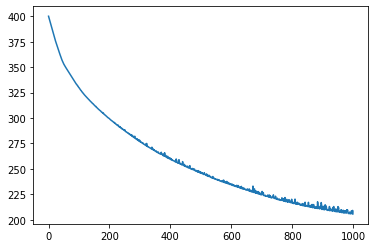

In [ ]:
from matplotlib import pyplot as plt
mySVM = SVM()
xp, yp = getDataPairForSVM(data[0], data[1])
w,b,loss = mySVM.fit(xp, yp, learning_rate=0.00001, maxItr=1000)
print(loss)
plt.plot(loss)

In [ ]:
def trainSVMs(x, y):
  svm_classifiers = {}

  for i in range(classes):
    svm_classifiers[i] = {}
    
    for j in range(i + 1, classes):
      xPair, yPair = getDataPairForSVM(data[i], data[j])
      wts, biases, loss = mySVM.fit(xPair, yPair, learning_rate=0.00001, maxItr=1000)
      svm_classifiers[i][j] = (wts, biases)

      plt.plot(loss)
      plt.show()
    
  return svm_classifiers

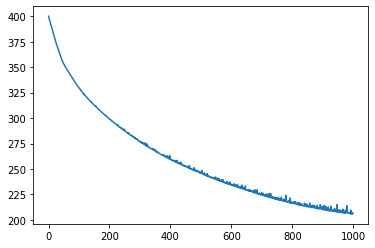

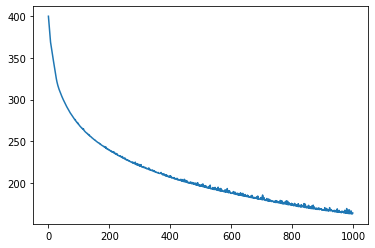

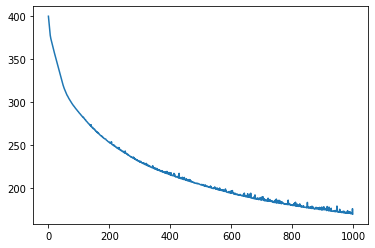

In [ ]:
svm_classifiers = trainSVMs(image_data, labels)

In [ ]:
#Model parameters for Cats & Dogs
cats_dogs = svm_classifiers[0][1]
cats_pandas = svm_classifiers[0][2]
print(cats_dogs[0].shape)   # weights (matrix)
print(cats_dogs[1].shape)   # bias (scalar)
print('Bias term for Cats - Dogs classification = ', cats_dogs[1])
print('Bias term for Cats - Pandas classification = ', cats_pandas[1])

(1, 3072)
()
Bias term for Cats - Dogs classification =  -0.015100000000000023
Bias term for Cats - Pandas classification =  0.02109000000000008


###Prediction

In [ ]:
def binaryPredict(x, w, b):
  z = np.dot(x, w.T) + b
  if z >= 0:
    return 1
  return -1

In [ ]:
def predict(x):
  count = np.zeros((classes, ))

  for i in range(classes):
    for j in range(i + 1, classes):
      w, b = svm_classifiers[i][j]

      #We need to take a majority prediction from each of the classifiers
      z = binaryPredict(x, w, b)

      if z == 1:
        count[j] += 1
      else:
        count[i] += 1
  
  final_prediction = np.argmax(count)
  # print(count)

  return final_prediction

In [ ]:
print(predict(image_data[0]))
print(labels[0])

2
2


In [ ]:
def accuracy(x, y):
  count = 0

  for i in range(x.shape[0]):
    prediction = predict(x[i])
    if (prediction == y[i]):
      count += 1
  
  return count / x.shape[0]

In [ ]:
accuracy(image_data, labels)

0.6483333333333333

###Using scikit

In [ ]:
from sklearn import svm

In [ ]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)

In [ ]:
svm_classifier.fit(image_data, labels)
svm_classifier.score(image_data, labels)

0.695

Accuracy similar to our model